In [1]:
from torch.utils.data import Dataset
from utils.data import read_csv, data_filter
from utils.constants import *
import os
import numpy as np
import pandas as pd
from skimage import io
from transform import Rescale, RandomHorizontalFlip, RandomVerticalFlip, ToTensor
from utils.vis import show_arrow_batch, show_image_batch
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from dataset import PlanktonDataset

In [2]:
img_dir = '/data5/Plankton_wi18/rawcolor_db/images'
csv_filename = 'data/data_train.csv'

In [3]:
transformed_dataset = PlanktonDataset(csv_file=csv_filename,
                                      img_dir=img_dir,
                                      transform=transforms.Compose([
                                          Rescale((224, 224)),
                                          RandomHorizontalFlip(),
                                          RandomVerticalFlip(),
                                          ToTensor()
                                      ]))

In [4]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

(0, torch.Size([4, 3, 224, 224]), torch.Size([4, 4]), torch.Size([4, 3, 48, 48]), [('Hydromedusae', 'Calanoida', 'Appendicularia (class)', 'Hydromedusae'), ('Hydromedusae (order)', 'Calanoida (order)', 'Appendicularia (class)', 'Hydromedusae (order)'), ('Hydromedusae (order)', 'Calanoida (order)', 'Appendicularia (class)', 'Hydromedusae (order)')])
(1, torch.Size([4, 3, 224, 224]), torch.Size([4, 4]), torch.Size([4, 3, 48, 48]), [('Cyclopoida', 'Mysida', 'Amphipoda', 'Cyclopoida'), ('Oithonidae', 'Mysida (order)', 'Gammaridae', 'Poecilostomatoida'), ('Oithonidae (family)', 'Mysida (order)', 'Gammaridae (family)', 'Poecilostomatoida (family)')])
(2, torch.Size([4, 3, 224, 224]), torch.Size([4, 4]), torch.Size([4, 3, 48, 48]), [('Hydromedusae', 'Ostracoda (class)', 'Cyclopoida', 'Euphausiacea'), ('Hydromedusae (order)', 'Ostracoda (class)', 'Poecilostomatoida', 'Euphausiidae'), ('Hydromedusae (order)', 'Ostracoda (class)', 'Poecilostomatoida (family)', 'Euphausiidae (family)')])
(3, torc

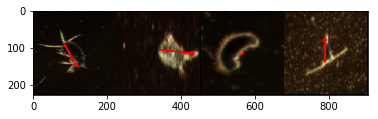

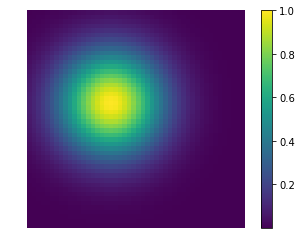

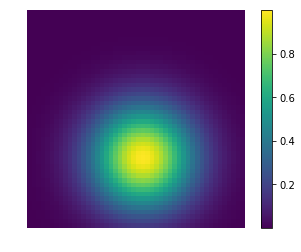

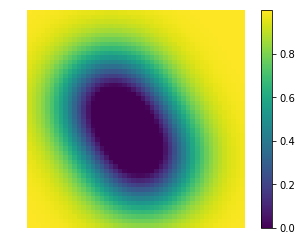

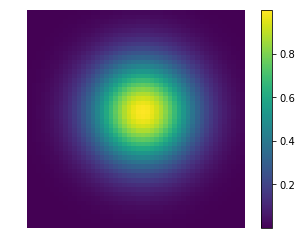

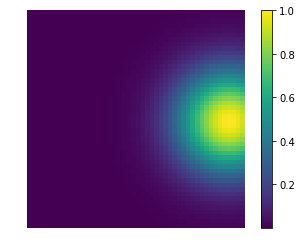

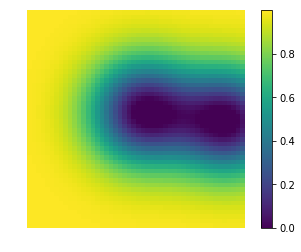

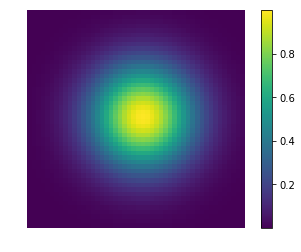

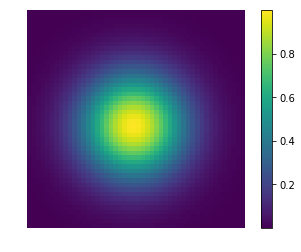

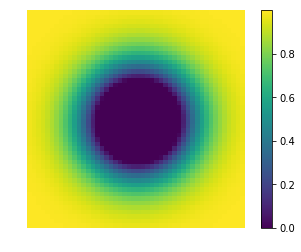

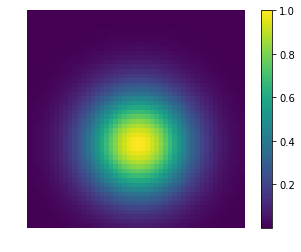

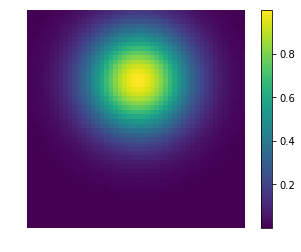

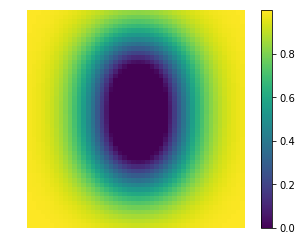

In [12]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['coordinates'].size(),
          sample_batched['target_map'].size(),
          sample_batched['cls'])

    if i_batch == 3:
        plt.figure()
        show_arrow_batch(sample_batched)
        plt.figure()
        show_image_batch(sample_batched['target_map'])
        plt.axis('off')
        plt.ioff()
        plt.show()
        break